<h2 style = "color : Blue"> Advanced Linear Regression Assignment </h2>

Project sections: 
- Load the data and understand the variables
- Data Inspection
- EDA
- Train-Test Split
- Missing Value Imputation if required
- Scaling if required
- Modelling
- Tuning with Regularization (Ridge & Lasso)
- Model Evaluation


In [472]:
#Python libraries import


In [473]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as stm
import warnings
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [474]:
#Load csv file of housing dataset
df_orig = pd.read_csv('train.csv') 

In [475]:
# Read data frame size
df_orig.shape

(1460, 81)

In [476]:
housing = df_orig

In [477]:
housing.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [478]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [479]:
# View the description of the dataset
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [480]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [481]:
# View unnique values of fileds
housing_nuique = housing.nunique()
pd.reset_option('all')

pd.set_option('display.max_rows', 500)
housing_nuique

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [482]:
percent_missing = housing.isnull().mean().round(4).mul(100).sort_values(ascending=False)
percent_missing.head()

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
dtype: float64

In [483]:
pd.reset_option('all')
print(percent_missing[percent_missing>0])


As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


In [484]:
pd.set_option('display.max_rows', 81)

print(percent_missing[percent_missing>20])


PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
dtype: float64


In [485]:
housing[['PoolQC', 'MiscFeature','Alley','FireplaceQu','Fence']].nunique()

PoolQC         3
MiscFeature    4
Alley          2
FireplaceQu    5
Fence          4
dtype: int64

#### Handle NaN values in the dataframe, since NA is 'Not Available' or 'Absence' which can influence sale price
##### Handle  ['PoolQC', 'MiscFeature','Alley','FireplaceQu','Fence'] data , as per descriptiom

In [486]:
housing1=housing
housing1.loc[housing['PoolQC'].isnull(),['PoolQC']] = 'NoPool'
housing1.loc[housing['Fence'].isnull(),['Fence']] = 'NoFence'
housing1.loc[housing['Alley'].isnull(),['Alley']] = 'NoAlley'
housing1.loc[housing['FireplaceQu'].isnull(),['FireplaceQu']] = 'NoFireplace'
housing1.loc[housing['MiscFeature'].isnull(),['MiscFeature']] = 'None'








##### Handle Basement data , as per description document

In [487]:
housing1.loc[housing1['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
housing1.loc[housing1['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
housing1.loc[housing1['BsmtExposure'].isnull(),['BsmtExposure']] = 'No Basement'
housing1.loc[housing1['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
housing1.loc[housing1['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'




##### Handle Garage data , as per description documenty

In [488]:
housing1.loc[housing1['GarageType'].isnull(),['GarageType']] = 'No Garage'
housing1.loc[housing1['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
housing1.loc[housing1['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
housing1.loc[housing1['GarageCond'].isnull(),['GarageCond']] = 'No Garage'


In [489]:
percent_missing2 = housing1.isnull().mean().round(4).mul(100).sort_values(ascending=False)
percent_missing2[percent_missing2>0]

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

     Find average and assign  to these agianst values with NA
     LotFrontage,  GarageYrBlt,  MasVnrType,  MasVnrArea  

In [490]:
housing1['LotFrontage'].describe()


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [491]:
housing1['LotFrontage'].replace(np.nan, housing1['LotFrontage'].mean(),inplace=True)


In [492]:
housing1['GarageYrBlt'].describe()


count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [493]:
housing1['GarageYrBlt'].replace(np.nan, housing1['GarageYrBlt'].mean(),inplace=True)


In [494]:
housing1['MasVnrType'].describe()


count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [495]:
housing1.loc[housing1['MasVnrType'].isnull(),['MasVnrType']] = 'None'


In [496]:
housing1['MasVnrArea'].describe()


count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [497]:
###A housing1.loc[housing1['MasVnrArea'].isnull(),['MasVnrArea']] = 0
housing1['MasVnrArea'].replace(np.nan, housing1['MasVnrArea'].mean(),inplace=True)



In [498]:
housing1['Electrical'].describe()


count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [499]:
housing1.loc[housing1['Electrical'].isnull(),['Electrical']] = 'SBrkr'

In [500]:
percent_missing5 = housing1.isnull().mean().round(4).mul(100).sort_values(ascending=False)
percent_missing5[percent_missing5>0]

Series([], dtype: float64)

#### Dropping unneccesary columns

In [501]:
housing1.drop(['Id'],axis=1,inplace=True)

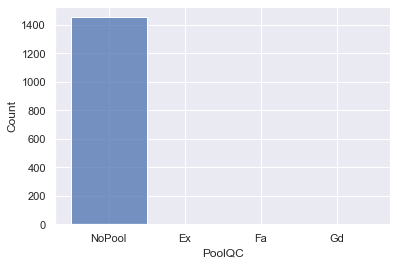

In [502]:
sns.set(style="darkgrid")

sns.histplot(housing1['PoolQC'])
plt.show()

Drop PoolQC as most of the values are None

In [503]:
housing1.drop(['PoolQC'],axis=1,inplace=True)

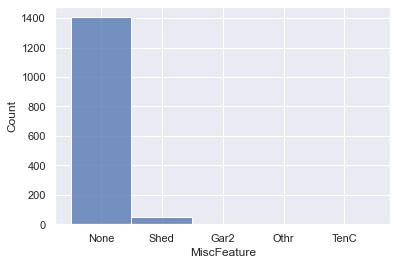

In [504]:
#MiscFeature    
sns.set(style="darkgrid")

sns.histplot(housing1['MiscFeature'])
plt.show()

In [505]:
# Drop MiscFeature
housing1.drop(['MiscFeature'],axis=1,inplace=True)

In [506]:
housing1.shape

(1460, 78)

In [507]:
# housing1['TotalSF'] = housing1['TotalBsmtSF'] + housing1['1stFlrSF'] + housing1['2ndFlrSF']
# housing1['house_age'] = 2022 - housing1['YearBuilt']
# housing1['garage_age'] = 2022 - housing1['GarageYrBlt']

# # Calculating the age between house building and remodelling time i.e. Ageing of the house
# housing1['timespan_model_remodel'] = housing1['YearRemodAdd'] - housing1['YearBuilt']


In [508]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Identifying Categorical Variables


In [509]:

housing_categorical = housing1.select_dtypes(include=['object'])

In [510]:
pd.set_option('display.max_columns', 81)
housing_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NoFireplace,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
1,RL,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
2,RL,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
3,RL,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NoFence,WD,Abnorml
4,RL,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal


#### Treating some numerical datatypes  as categorical

The year/month is a categorical variable. The ratio between two years is not meaningful which is why its not appropriate to classify it as a quantitative variable.

In [511]:
housing1['MoSold'] = housing1['MoSold'].astype('object')
housing1['YrSold'] = housing1['YrSold'].astype('object')
housing1['YearBuilt'] = housing1['YearBuilt'].astype('object')
housing1['YearRemodAdd'] = housing1['YearRemodAdd'].astype('object')
housing1['GarageYrBlt'] = housing1['GarageYrBlt'].astype('object')


 ##### We will try to convert  some discrete variables as type object
 Categorical variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order. For example, categorical predictors include gender, material type, and payment method. Discrete variables are numeric variables that have a countable number of values between any two values

In [512]:
housing1.select_dtypes(exclude=['object'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,175000
1456,20,85.0,13175,6,6,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,210000
1457,70,66.0,9042,7,9,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,266500
1458,20,68.0,9717,5,6,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,142125


In [513]:
convert_dicrete = ['MSSubClass', 'OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd','GarageCars']
for i in convert_dicrete:
    housing1[i] = housing1[i].astype('object')


In [514]:
housing1.select_dtypes(exclude=['object'])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,0,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,1,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,1,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,2,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,2,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,0,240,366,0,112,0,0,0,0,142125


In [515]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [516]:
housing_categorical = housing1.select_dtypes(include=[object])
housing_categorical


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,NoFireplace,Attchd,2003.0,RFn,2,TA,TA,Y,NoFence,2,2008,WD,Normal
1,20,RL,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,TA,Attchd,1976.0,RFn,2,TA,TA,Y,NoFence,5,2007,WD,Normal
2,60,RL,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,TA,Attchd,2001.0,RFn,2,TA,TA,Y,NoFence,9,2008,WD,Normal
3,70,RL,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,NoFence,2,2006,WD,Abnorml
4,60,RL,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,TA,Attchd,2000.0,RFn,3,TA,TA,Y,NoFence,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,TA,7,Typ,TA,Attchd,1999.0,RFn,2,TA,TA,Y,NoFence,8,2007,WD,Normal
1456,20,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,1,0,2,0,3,1,TA,7,Min1,TA,Attchd,1978.0,Unf,2,TA,TA,Y,MnPrv,2,2010,WD,Normal
1457,70,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,4,1,Gd,9,Typ,Gd,Attchd,1941.0,RFn,1,TA,TA,Y,GdPrv,5,2010,WD,Normal
1458,20,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,1,0,1,0,2,1,Gd,5,Typ,NoFireplace,Attchd,1950.0,Unf,1,TA,TA,Y,NoFence,4,2010,WD,Normal


In [517]:
housing_categorical.shape

(1460, 57)

In [518]:
housing_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

## Identifying Numerical Variables

In [519]:
housing_numerical=housing1.select_dtypes(include=['float64','int64'])
housing_numerical.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,0,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,1,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,836,192,84,0,0,0,0,0,250000


In [520]:
# Correlation matrix
correlation_matrix = housing_numerical.corr()

In [521]:
correlation_matrix

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.306795,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.235755,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.334901
LotArea,0.306795,1.000000,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.271364,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.179283,0.103960,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.247906,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,0.475241
BsmtFinSF1,0.215828,0.214103,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.260011,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.043340,0.111170,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.046921,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.122156,-0.002618,0.114184,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.051575,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.363358,0.260833,0.362452,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.339519,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.414266,0.299475,0.342160,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.410531,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.072483,0.050986,0.174019,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.194561,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.036849,0.004779,-0.069068,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.021272,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


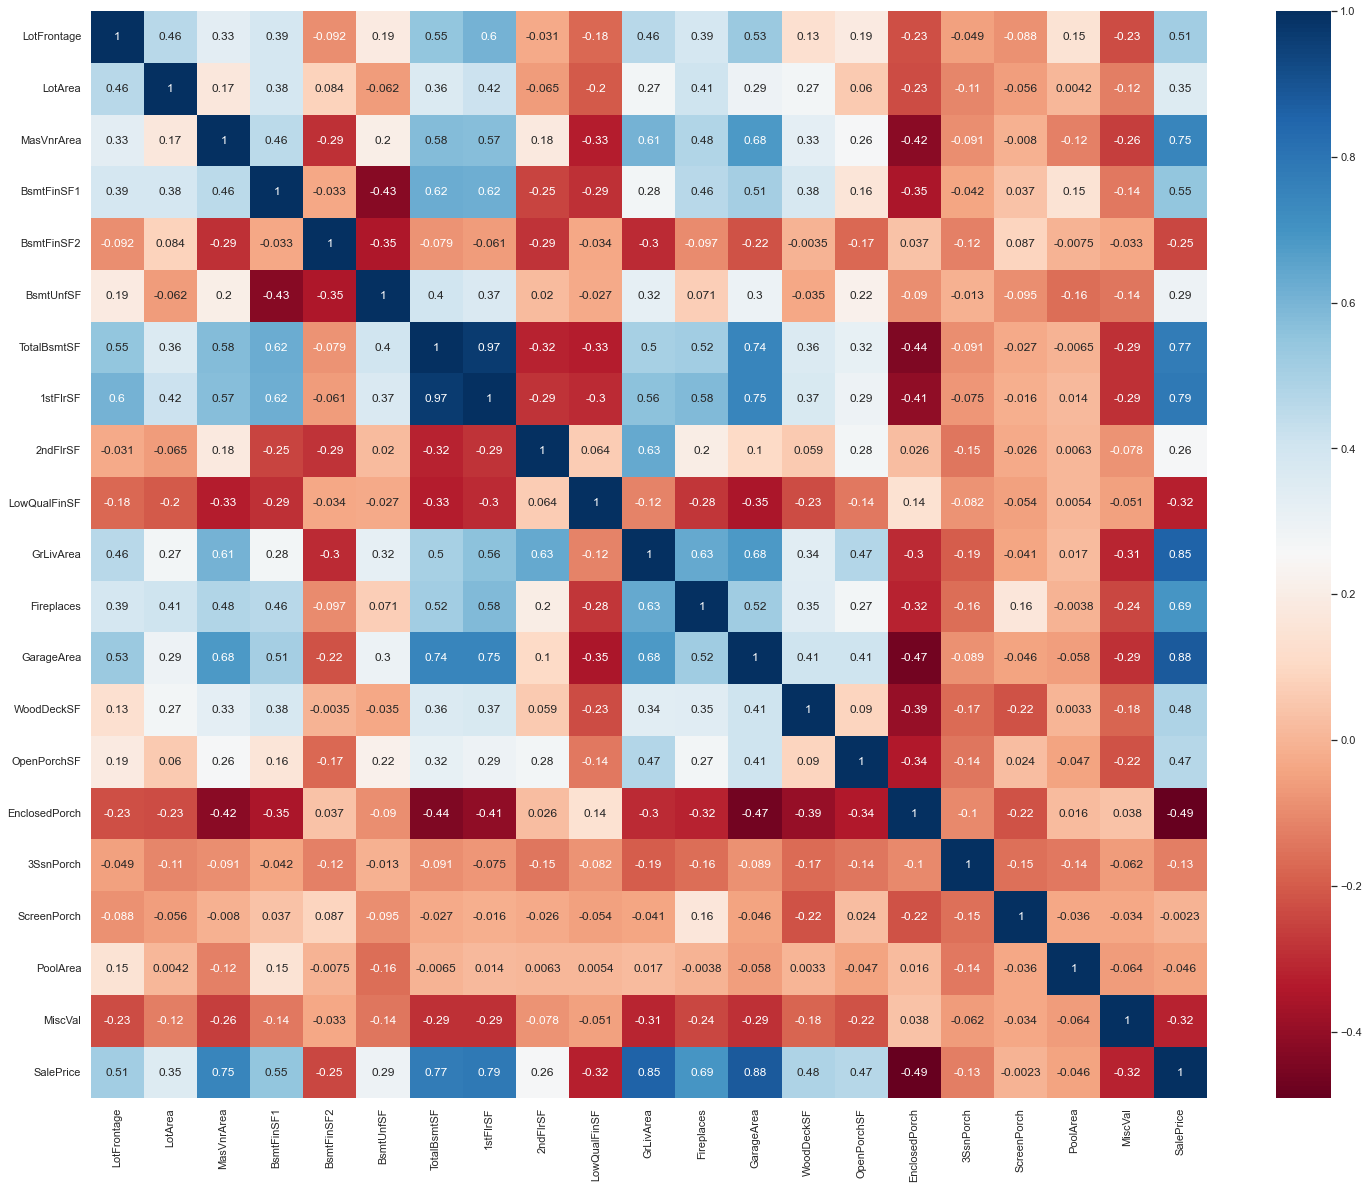

In [522]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
 
plt.figure(figsize = (25,20))
sns.heatmap(correlation_matrix.corr(), annot = True, cmap="RdBu")
plt.show()

<Figure size 7200x7200 with 0 Axes>

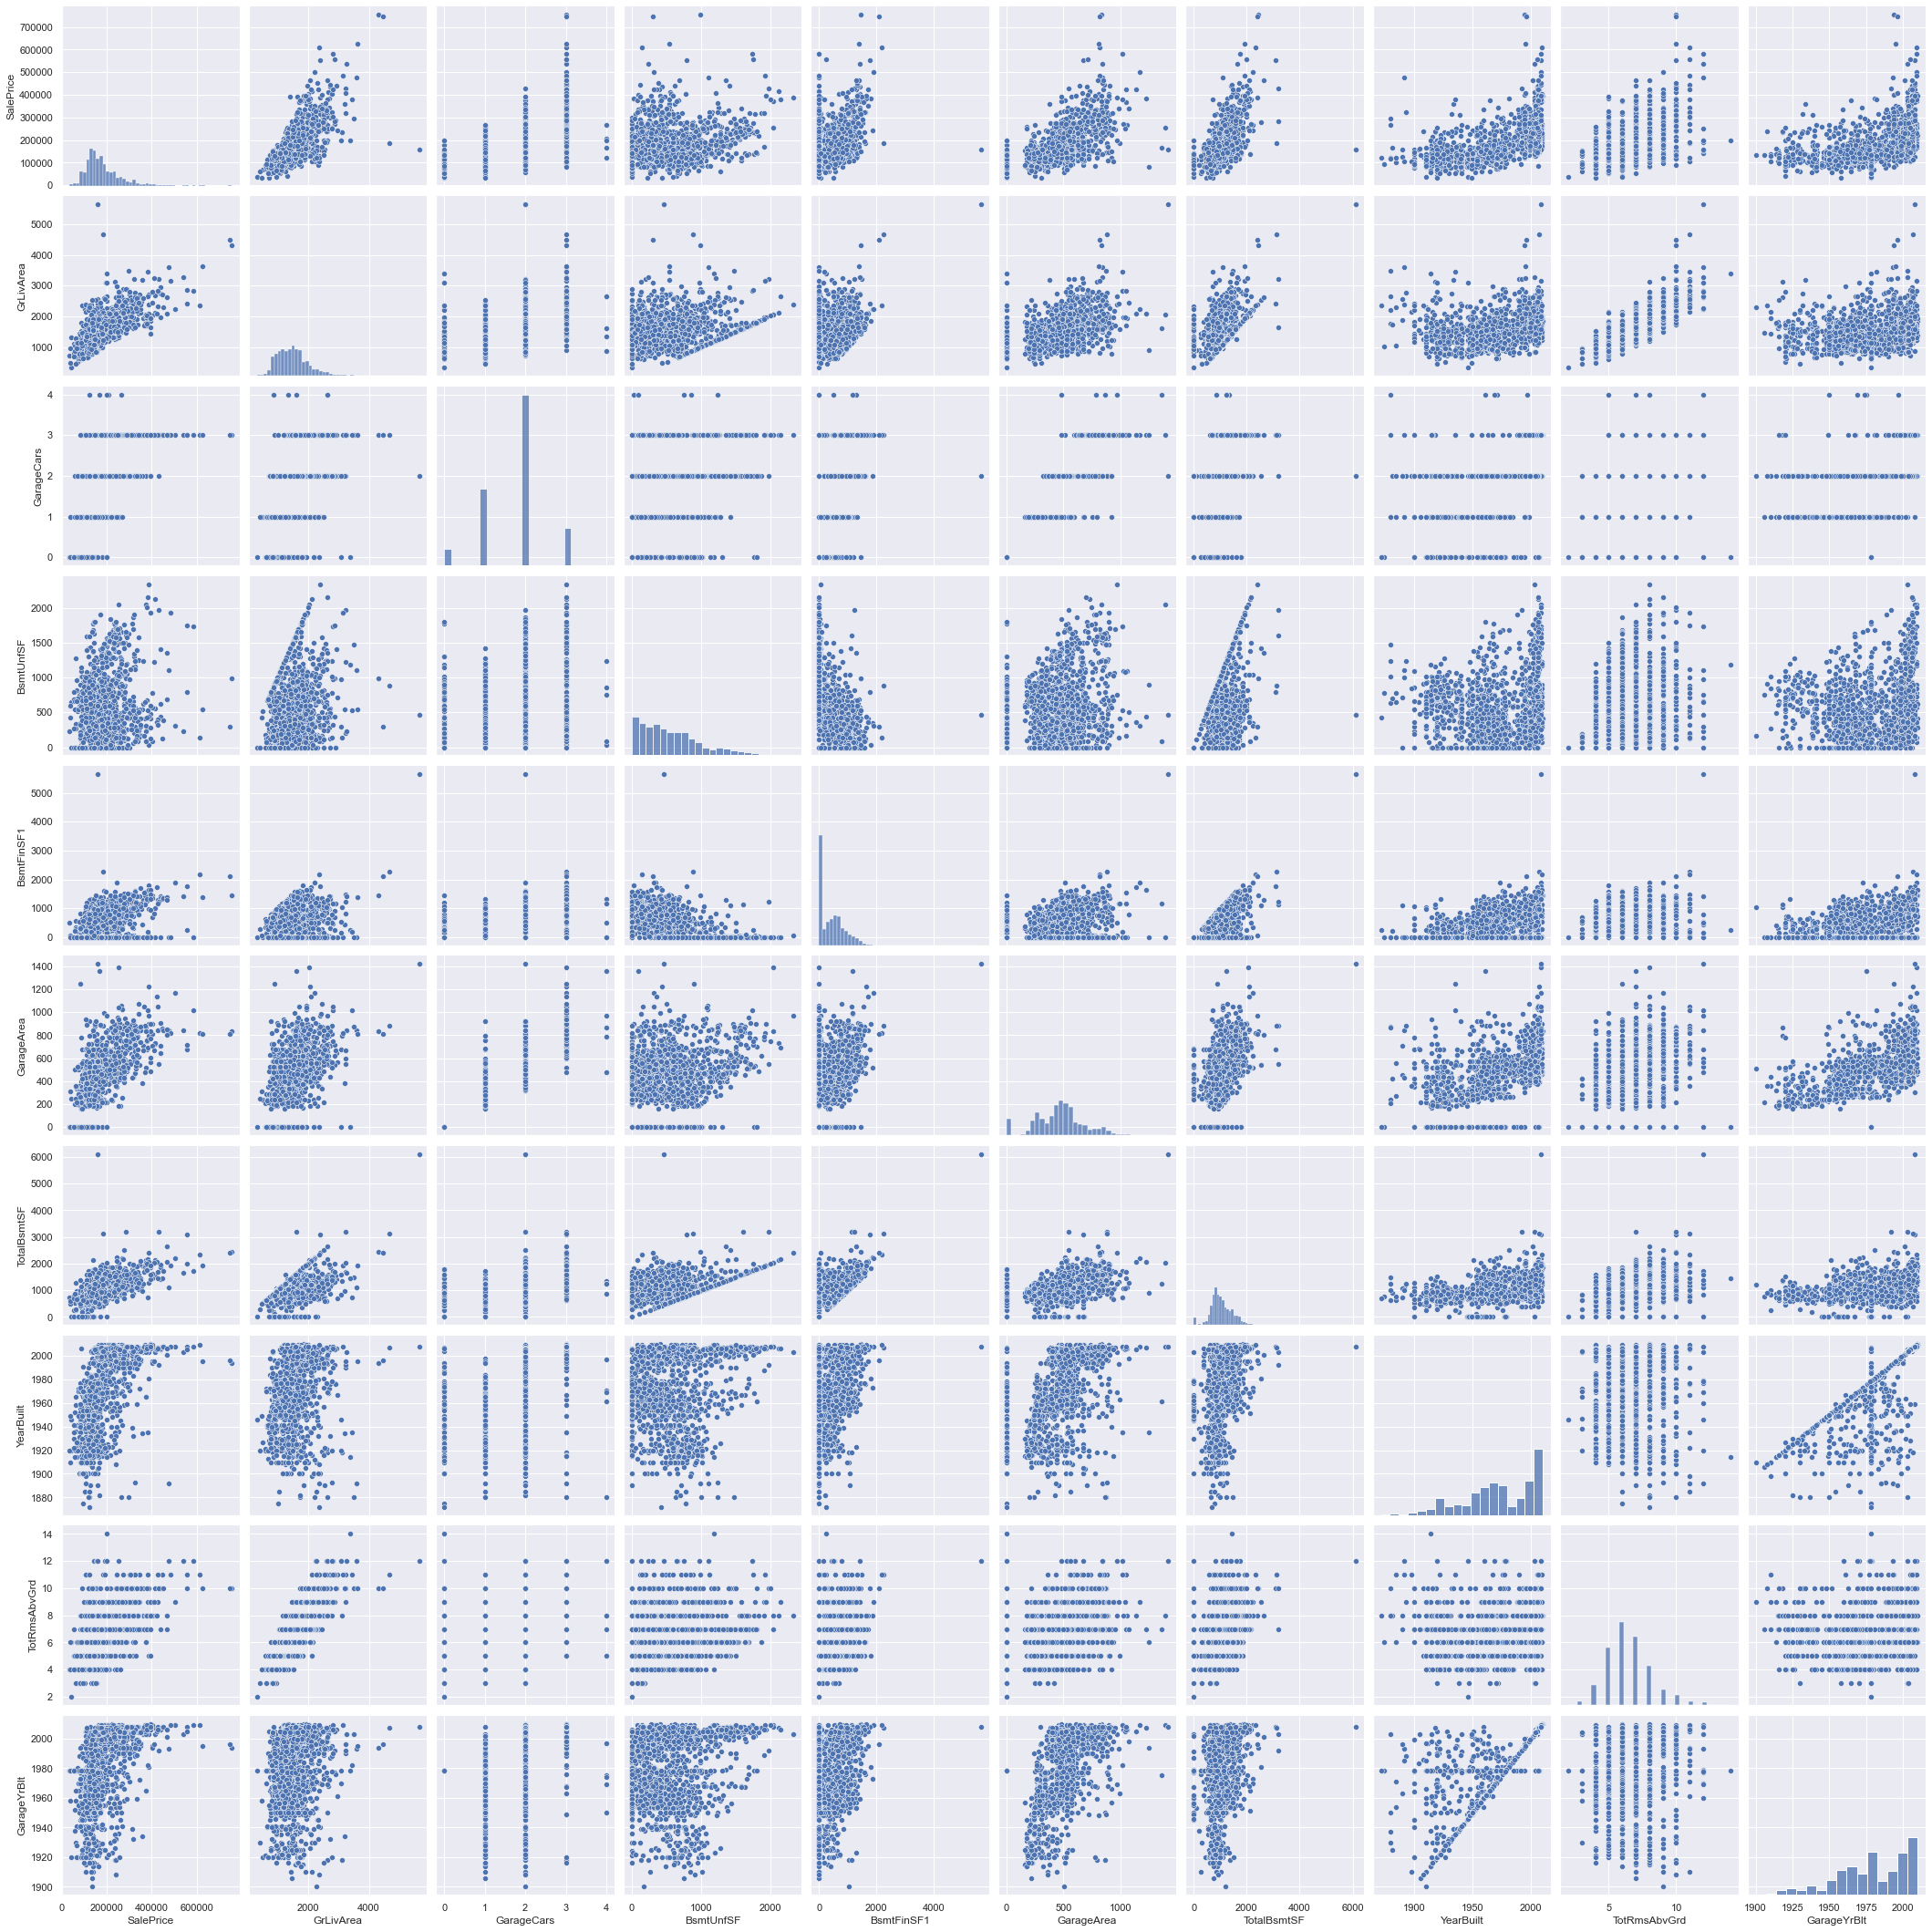

In [523]:
# Generating scatter plot
sns.set()
plt.figure(figsize=(100, 100))
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']

sns.pairplot(housing1[cols],size = 3)



Dropping columns which are correlated and not related to SalePrice


In [524]:
housing1 = housing1.drop(['GarageCars'], axis = 1)
housing1 = housing1.drop(['BsmtUnfSF'], axis = 1)
housing1 = housing1.drop(['TotRmsAbvGrd'], axis = 1)
housing1 = housing1.drop(['GarageYrBlt'], axis = 1)    



In [525]:
# Finding derived variable showing age of property
housing1['PropertyAge'] = (housing1['YrSold'] - housing1['YearBuilt'])


In [526]:
housing1housing1 = housing1.drop(['MoSold'], axis = 1)
housing1 = housing1.drop(['YrSold'], axis = 1)
housing1 = housing1.drop(['YearBuilt'], axis = 1)
housing1 = housing1.drop(['YearRemodAdd'], axis = 1)
housing1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NoFireplace,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,NoFence,0,2,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,NoFence,0,5,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,NoFence,0,9,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,NoFence,0,2,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,NoFence,0,12,WD,Normal,250000,8


In [527]:
housing_numerical=housing1.select_dtypes(include=['float64','int64'])
housing_numerical.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,0,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,1,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,1,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,1,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,1,836,192,84,0,0,0,0,0,250000


In [528]:
housing1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NoFireplace,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,NoFence,0,2,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,NoFence,0,5,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,NoFence,0,9,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,NoFence,0,2,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,NoFence,0,12,WD,Normal,250000,8


###  Exploratory Data Analysis Univariate 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

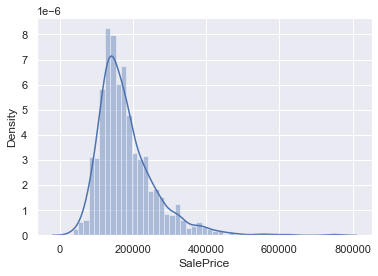

In [529]:
sns.distplot(housing1['SalePrice'])

In [530]:
housing_numerical.head(5)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,0,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,1,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,1,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,1,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,1,836,192,84,0,0,0,0,0,250000


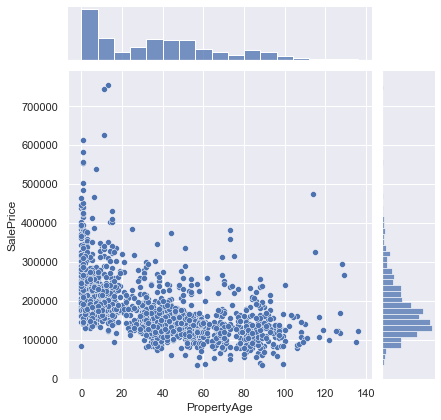

In [531]:
# PropertyAge vs SalePrice
sns.jointplot(x = housing1['PropertyAge'], y = housing1['SalePrice'])
plt.show()

In [532]:
housing1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
  

### Outlier treatment

In [533]:
housing1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NoFireplace,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,NoFence,0,2,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,NoFence,0,5,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,NoFence,0,9,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,NoFence,0,2,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,NoFence,0,12,WD,Normal,250000,8


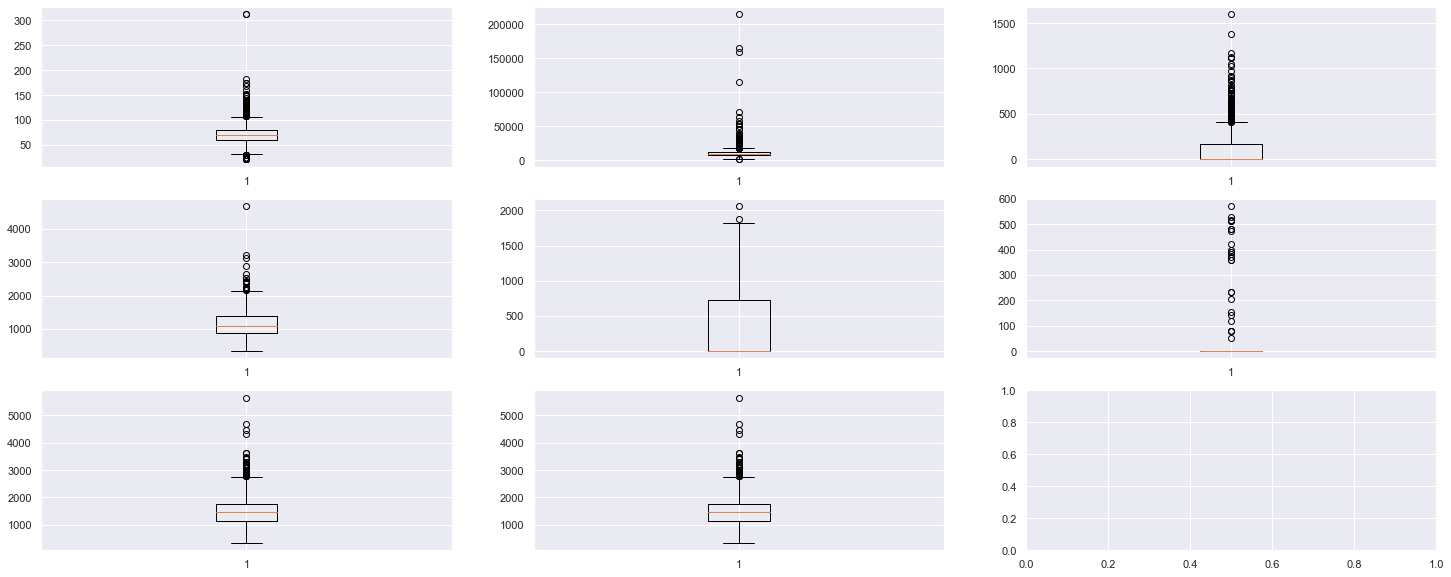

In [534]:
plt.figure(figsize=(25, 10))

plt.subplot(3,3,1)
plt.boxplot(housing1['LotFrontage'])
plt.subplot(3,3,2)
plt.boxplot(housing1['LotArea'])
plt.subplot(3,3,3)
plt.boxplot(housing1['MasVnrArea'])
plt.subplot(3,3,4)
plt.boxplot(housing1['1stFlrSF'])
plt.subplot(3,3,5)
plt.boxplot(housing1['2ndFlrSF'])
plt.subplot(3,3,6)
plt.boxplot(housing1['LowQualFinSF'])
plt.subplot(3,3,7)
plt.boxplot(housing1['GrLivArea'])

plt.subplot(3,3,8)
plt.boxplot(housing1['GrLivArea'])
plt.subplot(3,3,9)

plt.show()

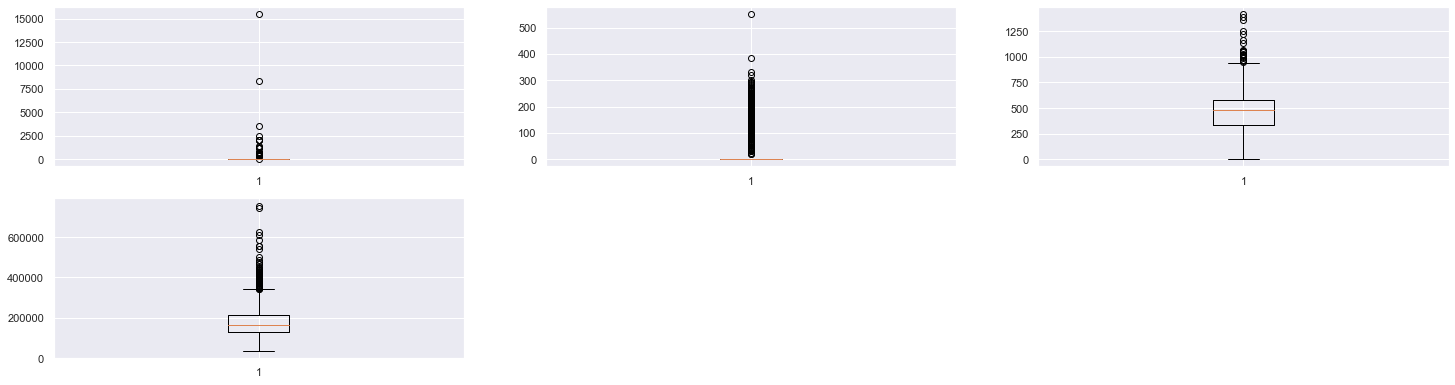

In [535]:
plt.figure(figsize=(25, 10))
plt.boxplot(housing1['PoolArea'])
plt.subplot(3,3,1)
plt.boxplot(housing1['MiscVal'])
plt.subplot(3,3,2)
plt.boxplot(housing1['EnclosedPorch'])
plt.subplot(3,3,3)
plt.boxplot(housing1['GarageArea'])
plt.subplot(3,3,4)
plt.boxplot(housing1['SalePrice'])
plt.show()

In [536]:
Qr1 = housing1.LotFrontage.quantile(0.25)
Qr3 = housing1.LotFrontage.quantile(0.75)
IQR = Qr3 - Qr1
housing1 = housing1[(housing1.LotFrontage >= Qr1 - 1.5*IQR) & (housing1.LotFrontage <= Qr3 + 1.5*IQR)]

In [537]:
Qr1 = housing1.LotArea.quantile(0.25)
Qr3 = housing1.LotArea.quantile(0.75)
IQR = Qr3 - Qr1
housing1 = housing1[(housing1.LotArea >= Qr1 - 1.5*IQR) & (housing1.LotArea <= Qr3 + 1.5*IQR)]

In [538]:
Qr1 = housing1.PoolArea.quantile(0.25)
Qr3 = housing1.PoolArea.quantile(0.75)
IQR = Qr3 - Qr1
df = housing1[(housing1.PoolArea >= Qr1 - 1.5*IQR) & (housing1.PoolArea <= Qr3 + 1.5*IQR)]

In [539]:
Qr1 = housing1.MiscVal.quantile(0.25)
Qr3 = housing1.MiscVal.quantile(0.75)
IQR = Qr3 - Qr1
housing1 = housing1[(df.MiscVal >= Qr1 - 1.5*IQR) & (housing1.MiscVal <= Qr3 + 1.5*IQR)]

In [540]:
Xval = housing1.drop(['SalePrice'], axis=1)

In [541]:
Yval = housing1['SalePrice']

### Preparing Dummy Variables


In [542]:
### Creating DUMMYs

In [543]:
housing1['CentralAir']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1454    Y
1455    Y
1456    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1238, dtype: object

In [544]:
housing1['Utilities']

0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
1454    AllPub
1455    AllPub
1456    AllPub
1458    AllPub
1459    AllPub
Name: Utilities, Length: 1238, dtype: object

In [545]:
housing1['Utilities']=housing1['CentralAir'].map({'AllPub': 1, "NoSeWa": 0})
housing1['CentralAir']=housing1['CentralAir'].map({'Y': 1, "N": 0})

In [546]:
housing1['Utilities']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1454   NaN
1455   NaN
1456   NaN
1458   NaN
1459   NaN
Name: Utilities, Length: 1238, dtype: float64

In [547]:
housing1['CentralAir']

0       1
1       1
2       1
3       1
4       1
       ..
1454    1
1455    1
1456    1
1458    1
1459    1
Name: CentralAir, Length: 1238, dtype: int64

In [548]:
housing_category_2=Xval.select_dtypes(include=['object'])

In [549]:
housing_dummy = pd.get_dummies(housing_category_2, drop_first=True)

In [550]:
housing_dummy.shape

(1238, 386)

In [551]:
Xval = Xval.drop(list(housing_category_2.columns), axis=1)

In [552]:
Xval = pd.concat([Xval, housing_dummy], axis=1)

In [553]:
Xval.shape

(1238, 405)

### Scale using sklearn


In [554]:
scaler = StandardScaler()
scale_data = Xval.columns
Xval[scale_data] = scaler.fit_transform(Xval[scale_data])

In [555]:
Xval

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,...,PropertyAge_79,PropertyAge_80,PropertyAge_81,PropertyAge_82,PropertyAge_83,PropertyAge_84,PropertyAge_85,PropertyAge_86,PropertyAge_87,PropertyAge_88,PropertyAge_89,PropertyAge_90,PropertyAge_91,PropertyAge_92,PropertyAge_93,PropertyAge_94,PropertyAge_95,PropertyAge_96,PropertyAge_97,PropertyAge_98,PropertyAge_99,PropertyAge_100,PropertyAge_102,PropertyAge_103,PropertyAge_104,PropertyAge_106,PropertyAge_107,PropertyAge_108,PropertyAge_109,PropertyAge_110,PropertyAge_111,PropertyAge_115,PropertyAge_117,PropertyAge_119,PropertyAge_125,PropertyAge_126,PropertyAge_127,PropertyAge_129,PropertyAge_135,PropertyAge_136
0,-0.259040,-0.308988,0.562726,0.647560,-0.281789,-0.484365,-0.851302,1.225510,-0.112001,0.448718,-0.936189,0.378427,-0.762801,0.250725,-0.371127,-0.107589,-0.274583,0.0,0.0,-0.227655,-0.040226,-0.098934,-0.3381,1.953745,-0.213561,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.146466,-0.209392,-0.114426,0.501766,-0.40304,0.028433,0.253946,-0.162893,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0.094683,-0.09024,-0.094683,-0.056934,-0.069786,-0.056934,-0.075408,-0.069786,-0.040226,-0.069786,-0.075408,-0.049286,-0.056934,-0.040226,-0.028433,-0.028433,-0.028433,-0.049286,-0.028433,-0.049286,-0.028433,-0.040226,-0.028433,-0.028433,-0.040226,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433
1,0.771749,0.100709,-0.576737,1.289112,-0.281789,0.515153,0.295006,-0.778503,-0.112001,-0.483623,0.671303,-0.042527,1.771286,-0.725418,-0.371127,-0.107589,-0.274583,0.0,0.0,-0.227655,-0.040226,-0.098934,-0.3381,-0.511837,-0.213561,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.146466,-0.209392,-0.114426,0.501766,-0.40304,0.028433,0.253946,-0.162893,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0.094683,-0.09024,-0.094683,-0.056934,-0.069786,-0.056934,-0.075408,-0.069786,-0.040226,-0.069786,-0.075408,-0.049286,-0.056934,-0.040226,-0.028433,-0.028433,-0.028433,-0.049286,-0.028433,-0.049286,-0.028433,-0.040226,-0.028433,-0.028433,-0.040226,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433
2,-0.052882,0.688536,0.365064,0.128659,-0.281789,-0.326806,-0.670603,1.253669,-0.112001,0.606883,0.671303,0.665440,-0.762801,-0.053320,-0.371127,-0.107589,-0.274583,0.0,0.0,-0.227655,-0.040226,-0.098934,-0.3381,1.953745,-0.213561,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.146466,-0.209392,-0.114426,0.501766,-0.40304,0.028433,0.253946,-0.162893,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0.094683,-0.09024,-0.094683,-0.056934,-0.069786,-0.056934,-0.075408,-0.069786,-0.040226,-0.069786,-0.075408,-0.049286,-0.056934,-0.040226,-0.028433,-0.028433,-0.028433,-0.049286,-0.028433,-0.049286,-0.028433,-0.040226,-0.028433,-0.028433,-0.040226,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433
3,-0.602637,0.082897,-0.576737,-0.508176,-0.281789,-0.730552,-0.554843,0.995541,-0.112001,0.463286,0.671303,0.828081,-0.762801,-0.165336,4.169670,-0.107589,-0.274583,0.0,0.0,-0.227655,-0.040226,-0.098934,-0.3381,-0.511837,4.682513,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.146466,-0.209392,-0.114426,0.501766,-0.40304,0.028433,0.253946,-0.162893,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0.094683,-0.09024,-0.094683,-0.056934,14.329457,-0.056934,-0.075408,-0.069786,-0.040226,-0.069

### Building the models with the processed dataset

In [556]:
X_train, X_test, y_train, y_test = train_test_split(Xval, Yval,train_size=0.70, test_size = 0.30, random_state = 90)

In [557]:
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)

LinearRegression()

In [558]:
#Prediction using prepared data
y_train_pred = lin_mod.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9652358002103542

In [559]:
y_test_pred = lin_mod.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-9.015679413687204e+21

In [560]:
parm = list(lin_mod.coef_)
parm.insert(0, lin_mod.intercept_)
parm = [round(x,3) for x in parm]
cols = Xval.columns
cols = cols.insert(0, "constant_val")
list(zip(cols, parm))

[('constant_val', 44975699327796.88),
 ('LotFrontage', 1210.915),
 ('LotArea', 7228.76),
 ('MasVnrArea', 57.039),
 ('BsmtFinSF1', 5006.985),
 ('BsmtFinSF2', 979.604),
 ('TotalBsmtSF', 9103.936),
 ('1stFlrSF', 1962738789360358.0),
 ('2ndFlrSF', 2361540300618961.0),
 ('LowQualFinSF', 253148068276543.53),
 ('GrLivArea', -2662815651674492.5),
 ('Fireplaces', -1447.129),
 ('GarageArea', 4765.176),
 ('WoodDeckSF', 898.872),
 ('OpenPorchSF', 2498.473),
 ('EnclosedPorch', 71.936),
 ('3SsnPorch', 984.101),
 ('ScreenPorch', 2889.285),
 ('PoolArea', 1623553972426578.2),
 ('MiscVal', 1090351121234811.5),
 ('MSSubClass_30', -1584.362),
 ('MSSubClass_40', 521853039314591.7),
 ('MSSubClass_45', 2245775464205857.5),
 ('MSSubClass_50', 1291.318),
 ('MSSubClass_60', 2795.635),
 ('MSSubClass_70', 570.584),
 ('MSSubClass_75', 2768.498),
 ('MSSubClass_80', -4043.604),
 ('MSSubClass_85', -156.355),
 ('MSSubClass_90', -1259438095472684.8),
 ('MSSubClass_120', -691.676),
 ('MSSubClass_160', 1560.977),
 ('MSSu

##### Overfit model observed ,  proceeding with Lasso and Ridge for further analysis

 
<h3 style = "color : Red"> Lasso Regression </h3>

In [561]:
lin_mod = Lasso(alpha=0.001)
lin_mod.fit(X_train, y_train)

Lasso(alpha=0.001)

In [562]:
y_train_pred = lin_mod.predict(X_train)
y_test_pred = lin_mod.predict(X_test)

In [563]:
print(y_train_pred,y_test_pred)

[151240.77172562 115234.58226254 123049.6021522  150091.31328308
 149132.26784554 161432.09557457 122626.38568995 161920.56532151
 115427.95866867 297296.70907975 241141.83704541 214985.84810322
 284430.47978069 210570.38957811 156851.13062417 227493.14962144
 201408.2562257  242044.01978797 154723.41294755  77678.86376299
 133137.06352653 178780.96274219 142756.93913646 143867.44619718
 115047.96315387 237140.75516734 124510.43237944 163252.05112248
  83082.68570436 188009.29271558  97676.44045118  83995.42676231
 113161.23116406 184122.37495462 130167.29243837 106462.49432237
 105722.14855469 203108.63515761 138776.11280629 245713.14377062
 120000.05518591 117408.32069678 141550.52882396 160910.33773124
  98399.74886405 220073.72659058 301859.3145598  173497.23782353
 190493.29507635 280915.75833669 162105.33633802 117991.41703215
 134002.13103398 230937.41629145 171665.25597837 236039.39937329
 185267.03890746 240292.78845473 144084.81644721 151642.92965614
 117420.07710925  85001.2

In [564]:
#Metrics obtained with train and test data 
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9652246927534481
0.8716873908133707


In [565]:
parm = list(lin_mod.coef_)
parm.insert(0, lin_mod.intercept_)
parm = [round(x,3) for x in parm]
cols = Xval.columns
cols = cols.insert(0, "constant_val")
list(zip(cols, parm))

[('constant_val', 179006.372),
 ('LotFrontage', 1251.388),
 ('LotArea', 7208.733),
 ('MasVnrArea', 74.328),
 ('BsmtFinSF1', 5043.742),
 ('BsmtFinSF2', 968.616),
 ('TotalBsmtSF', 8865.784),
 ('1stFlrSF', 15970.793),
 ('2ndFlrSF', 23249.63),
 ('LowQualFinSF', 2721.494),
 ('GrLivArea', 4100.954),
 ('Fireplaces', -1424.557),
 ('GarageArea', 4711.292),
 ('WoodDeckSF', 902.839),
 ('OpenPorchSF', 2503.803),
 ('EnclosedPorch', 55.095),
 ('3SsnPorch', 993.522),
 ('ScreenPorch', 2890.584),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MSSubClass_30', -1589.987),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 1626.915),
 ('MSSubClass_50', 1313.485),
 ('MSSubClass_60', 2920.78),
 ('MSSubClass_70', 618.257),
 ('MSSubClass_75', 2735.616),
 ('MSSubClass_80', -3990.032),
 ('MSSubClass_85', -147.398),
 ('MSSubClass_90', -5539.326),
 ('MSSubClass_120', -604.493),
 ('MSSubClass_160', 1602.187),
 ('MSSubClass_180', -1275.142),
 ('MSSubClass_190', 475.192),
 ('MSZoning_FV', 12718.181),
 ('MSZoning_RH', 6035.215),

In [566]:
# Hyper-tuning using K-Fold
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# Specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='r2', verbose=1)

In [567]:
# Hold the result in res
res = pd.DataFrame(model_cv.cv_results_)

In [568]:
res.shape

(27, 21)

In [569]:
#Analyse  parameters
model_cv.best_params_

{'alpha': 200}

### r2 score 

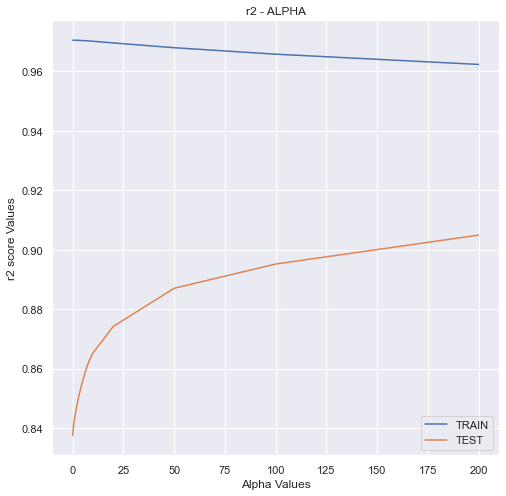

In [570]:
res['param_alpha'] = res['param_alpha'].astype('float32')
plt.figure(figsize=(8,8))
plt.plot(res['param_alpha'], res['mean_train_score'])
plt.plot(res['param_alpha'], res['mean_test_score'])
plt.xlabel('Alpha Values')
plt.ylabel('r2 score Values')
plt.title("r2 - ALPHA")
plt.legend(['TRAIN', 'TEST'], loc='lower right')
plt.show()

### K-Fold with neg_mean_absolute_error 


In [571]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [572]:
res2 = pd.DataFrame(model_cv.cv_results_)

In [573]:
res2.shape

(27, 21)

In [574]:
model_cv.best_params_

{'alpha': 200}

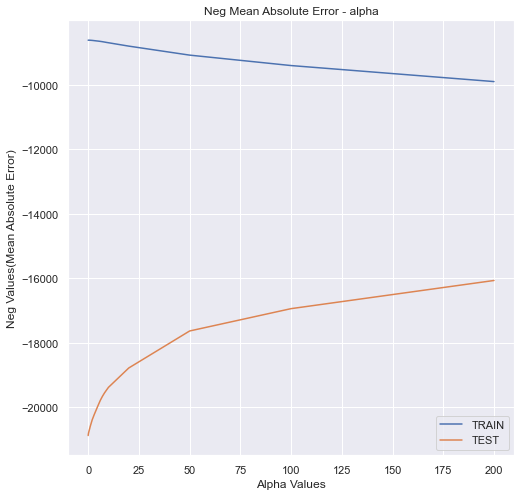

In [575]:
res2['param_alpha'] = res2['param_alpha'].astype('float32')
plt.figure(figsize=(8,8))


plt.plot(res2['param_alpha'], res2['mean_train_score'])
plt.plot(res2['param_alpha'], res2['mean_test_score'])
plt.xlabel('Alpha Values')
plt.ylabel('Neg Values(Mean Absolute Error)')

plt.title("Neg Mean Absolute Error - alpha")
plt.legend(['TRAIN', 'TEST'], loc='lower right')
plt.show()

In [576]:
lin_mod = Lasso(alpha=200)
lin_mod.fit(X_train, y_train)
y_train_pred = lin_mod.predict(X_train)
y_test_pred = lin_mod.predict(X_test)

In [577]:
y_train_pred

array([150779.99869005, 116599.32169152, 129764.79946385, 154722.38921151,
       146747.34831203, 161999.56312508, 126725.70039078, 157491.96724862,
       115002.26999606, 304949.00616826, 241835.0808328 , 221534.25119606,
       280871.4835393 , 208285.9950148 , 156513.84576926, 230589.13088821,
       199078.13061783, 248775.13796857, 159736.76634367,  73283.9863318 ,
       128689.29965738, 179034.93581587, 143946.76617427, 148447.13233505,
       116290.32807165, 235206.26707238, 118978.48095929, 165947.34819692,
        83581.36359101, 188189.3377381 ,  88015.52406929,  79987.57650026,
       109317.35422084, 177672.89182764, 127090.91232586, 110655.86470116,
       102318.03861798, 210958.04799812, 146097.62882969, 248198.4167026 ,
       115079.48873444, 117025.69737941, 142755.95085085, 164889.34201071,
       101678.15000172, 215872.61834484, 297227.10304067, 167517.54974618,
       192088.07899265, 270994.28826222, 163378.18518218, 118185.25991403,
       139145.42056374, 2

In [578]:
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9576235768725082
0.9021357907995701


In [579]:
# Seelcting alpha value : 200  

In [580]:
parm = list(lin_mod.coef_)
parm.insert(0, lin_mod.intercept_)
parm = [round(i, 3) for i in parm]
cols = Xval.columns
cols = cols.insert(0, "constant_val")
list(zip(cols, parm))
data=dict(zip(cols, parm))
{k: j for k, j in sorted(data.items(), key=lambda item: item[1])}

{'KitchenQual_TA': -6841.34,
 'KitchenQual_Gd': -5003.501,
 'BsmtQual_Gd': -4403.551,
 'BsmtQual_TA': -4349.769,
 'KitchenAbvGr_2': -3074.074,
 'Neighborhood_Edwards': -2425.366,
 'Neighborhood_NAmes': -2268.78,
 'Functional_Mod': -2261.408,
 'PropertyAge_117': -2093.152,
 'HouseStyle_2.5Fin': -2078.715,
 'OverallCond_3': -1984.246,
 'KitchenQual_Fa': -1978.549,
 'BsmtExposure_No': -1903.109,
 'OverallCond_4': -1853.813,
 'Neighborhood_IDOTRR': -1771.2,
 'ExterQual_TA': -1762.416,
 'BedroomAbvGr_5': -1675.041,
 'PropertyAge_99': -1622.984,
 'PropertyAge_107': -1605.489,
 'HeatingQC_TA': -1368.934,
 'Neighborhood_NWAmes': -1314.728,
 'Neighborhood_OldTown': -1290.531,
 'PropertyAge_119': -1256.342,
 'PropertyAge_111': -1214.048,
 'BsmtFinType1_Rec': -1173.495,
 'PropertyAge_98': -1105.118,
 'PropertyAge_89': -1030.918,
 'GarageCond_Fa': -993.798,
 'PropertyAge_80': -992.375,
 'PropertyAge_136': -990.9,
 'Utilities_NoSeWa': -971.74,
 'PropertyAge_20': -964.826,
 'BedroomAbvGr_4': -956.2,

#### r2 values : Training Data =  0.95, Test Data : 0.93

<h2 style = "color : Red"> Performing Ridge regression </h2>

In [581]:
lin_mod = Ridge(alpha=0.001)
lin_mod.fit(X_train, y_train)

y_train_pred = lin_mod.predict(X_train)

y_test_pred = lin_mod.predict(X_test)


In [582]:
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9652357771245837
0.871675916140561


In [583]:
#K-Folds with hyper-tuning the parm.

In [584]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


RMSE : 26588.20514818903


In [585]:
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [586]:
# results data frame
res = pd.DataFrame(model_cv.cv_results_)

In [587]:
res.shape

(5, 21)

In [588]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015799,0.000748,0.004801,0.000401,0.001,{'alpha': 0.001},0.845893,0.865227,0.829143,0.799939,0.831957,0.834432,0.021464,5,0.969480,0.968342,0.972659,0.972859,0.971530,0.970974,0.001781
1,0.015401,0.000800,0.004800,0.000400,0.01,{'alpha': 0.01},0.846109,0.865361,0.829334,0.800694,0.832151,0.834730,0.021270,4,0.969480,0.968342,0.972658,0.972859,0.971530,0.970974,0.001781
2,0.015801,0.000400,0.005201,0.000400,1.0,{'alpha': 1.0},0.858911,0.874596,0.843294,0.831593,0.841227,0.849924,0.015133,3,0.969287,0.968140,0.972432,0.972556,0.971394,0.970762,0.001758
3,0.017201,0.002400,0.004801,0.000400,5.0,{'alpha': 5.0},0.874272,0.889925,0.862654,0.850220,0.852934,0.866001,0.014641,2,0.968282,0.967198,0.971349,0.971633,0.970601,0.969813,0.001759
4,0.016601,0.003263,0.004400,0.000490,10.0,{'alpha': 10.0},0.881694,0.898369,0.872325,0.860400,0.859729,0.874503,0.014444,1,0.967353,0.966228,0.970341,0.970902,0.969773,0.968919,0.001810


In [589]:
model_cv.best_params_

{'alpha': 10.0}

In [590]:
#Visualizing the data

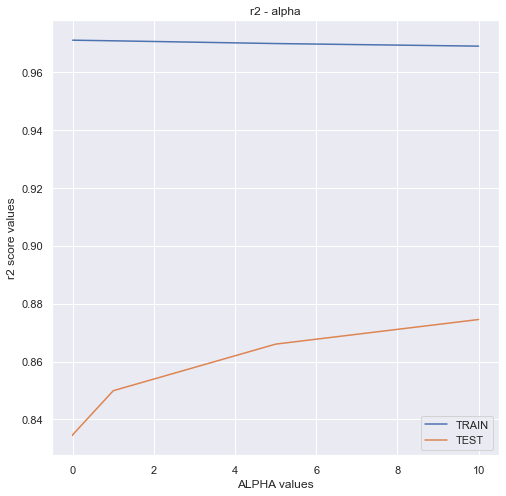

In [591]:
res['param_alpha'] = res['param_alpha'].astype('int32')

plt.figure(figsize=(8,8))
plt.plot(res['param_alpha'], res['mean_train_score'])
plt.plot(res['param_alpha'], res['mean_test_score'])
plt.xlabel('ALPHA values')
plt.ylabel('r2 score values')
plt.title("r2 - alpha")
plt.legend(['TRAIN', 'TEST'], loc='lower right')
plt.show()

In [592]:
#K-Fold with neg_mean_absolute_error 

params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds,return_train_score=True,verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [593]:
res2 = pd.DataFrame(model_cv.cv_results_)

In [594]:
res2.shape

(5, 21)

In [595]:
model_cv.best_params_

{'alpha': 10.0}

In [596]:
res2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016601,0.001356,0.005200,0.000749,0.001,{'alpha': 0.001},-21228.354672,-20503.157942,-22807.925302,-22657.567042,-21532.131372,-21745.827266,873.726791,5,-8766.041238,-9000.009067,-8288.986144,-8420.346184,-8524.478869,-8599.972300,253.884027
1,0.015401,0.000800,0.004600,0.000489,0.01,{'alpha': 0.01},-21212.210540,-20484.055820,-22787.957208,-22617.347747,-21519.125588,-21724.139381,868.497390,4,-8766.111424,-9000.189433,-8288.876796,-8420.613088,-8524.326504,-8600.023449,253.948174
2,0.021201,0.001468,0.005398,0.000801,1.0,{'alpha': 1.0},-20191.660260,-19526.786894,-21742.269120,-21209.156819,-20914.007065,-20716.776032,777.791195,3,-8808.845740,-9027.959354,-8327.607244,-8543.293093,-8541.432404,-8649.827567,242.979616
3,0.019602,0.002871,0.004399,0.000492,5.0,{'alpha': 5.0},-19332.624774,-18475.779146,-20538.302972,-20316.380447,-19769.396747,-19686.496817,737.599107,2,-8989.019840,-9141.088447,-8458.415901,-8747.801906,-8672.954772,-8801.856173,239.832204
4,0.016200,0.000400,0.004601,0.000491,10.0,{'alpha': 10.0},-18899.126354,-17748.072492,-19953.131994,-19654.338539,-19027.977138,-19056.529303,761.435803,1,-9118.119725,-9261.221570,-8579.382271,-8886.970198,-8796.611153,-8928.460983,239.859066


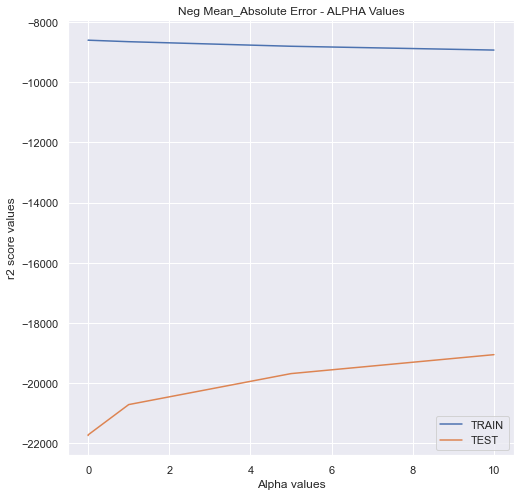

In [597]:
res2['param_alpha'] = res2['param_alpha'].astype('int32')

plt.figure(figsize=(8,8))
plt.plot(res2['param_alpha'], res2['mean_train_score'])
plt.plot(res2['param_alpha'], res2['mean_test_score'])
plt.xlabel('Alpha values')
plt.ylabel('r2 score values')
plt.title("Neg Mean_Absolute Error - ALPHA Values")
plt.legend(['TRAIN', 'TEST'], loc='lower right')
plt.show()

In [598]:
# Selecting Alpha as 10
lin_mod = Ridge(alpha=10)
lin_mod.fit(X_train, y_train)
y_train_pred = lin_mod.predict(X_train)
y_test_pred = lin_mod.predict(X_test)

In [599]:
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9638849263093467
0.8875009275865671


In [600]:
#Drop variables with no zero co-eff.


In [601]:
X_temp=cols.drop(['LotFrontage','1stFlrSF',
                  'GarageArea','PoolArea','MiscVal',
                  'MSSubClass_50','MSSubClass_60','MSSubClass_190','Alley_Pave',
                  'Neighborhood_SWISU','Neighborhood_SawyerW','Condition2_Norm',
                  'Condition2_RRAn','Condition2_PosA','BldgType_TwnhsE','HouseStyle_1Story',
                  'HouseStyle_SLvl','OverallCond_6','RoofStyle_Hip','RoofMatl_Roll',
                  'Exterior1st_Stucco','Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
                  'Exterior2nd_Plywood','Neighborhood_MeadowV','Exterior1st_AsphShn',
                  'ExterCond_TA','BsmtQual_No Basement','BsmtCond_Gd','GarageQual_Gd',
                  'BsmtCond_Po','BsmtCond_No Basement','BsmtExposure_No Basement',
                  'BsmtFinType1_No Basement','BsmtFinType1_No Basement','FireplaceQu_Gd',
                  'BsmtFinType2_GLQ','BsmtFinType2_No Basement','Functional_Min1',
                  'GarageType_Attchd','GarageType_CarPort','GarageFinish_No Garage',
                  'GarageQual_No Garage','GarageCond_No Garage',
                  'SaleType_ConLD','SaleType_ConLw','SaleType_New'])


In [602]:
X_temp

Index(['constant_val', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Fireplaces',
       ...
       'PropertyAge_111', 'PropertyAge_115', 'PropertyAge_117',
       'PropertyAge_119', 'PropertyAge_125', 'PropertyAge_126',
       'PropertyAge_127', 'PropertyAge_129', 'PropertyAge_135',
       'PropertyAge_136'],
      dtype='object', length=360)

In [603]:
col_list=list(X_temp)

In [604]:
col_list

['constant_val',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_NoAlley',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Ne

In [605]:
Xval

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,...,PropertyAge_79,PropertyAge_80,PropertyAge_81,PropertyAge_82,PropertyAge_83,PropertyAge_84,PropertyAge_85,PropertyAge_86,PropertyAge_87,PropertyAge_88,PropertyAge_89,PropertyAge_90,PropertyAge_91,PropertyAge_92,PropertyAge_93,PropertyAge_94,PropertyAge_95,PropertyAge_96,PropertyAge_97,PropertyAge_98,PropertyAge_99,PropertyAge_100,PropertyAge_102,PropertyAge_103,PropertyAge_104,PropertyAge_106,PropertyAge_107,PropertyAge_108,PropertyAge_109,PropertyAge_110,PropertyAge_111,PropertyAge_115,PropertyAge_117,PropertyAge_119,PropertyAge_125,PropertyAge_126,PropertyAge_127,PropertyAge_129,PropertyAge_135,PropertyAge_136
0,-0.259040,-0.308988,0.562726,0.647560,-0.281789,-0.484365,-0.851302,1.225510,-0.112001,0.448718,-0.936189,0.378427,-0.762801,0.250725,-0.371127,-0.107589,-0.274583,0.0,0.0,-0.227655,-0.040226,-0.098934,-0.3381,1.953745,-0.213561,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.146466,-0.209392,-0.114426,0.501766,-0.40304,0.028433,0.253946,-0.162893,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0.094683,-0.09024,-0.094683,-0.056934,-0.069786,-0.056934,-0.075408,-0.069786,-0.040226,-0.069786,-0.075408,-0.049286,-0.056934,-0.040226,-0.028433,-0.028433,-0.028433,-0.049286,-0.028433,-0.049286,-0.028433,-0.040226,-0.028433,-0.028433,-0.040226,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433
1,0.771749,0.100709,-0.576737,1.289112,-0.281789,0.515153,0.295006,-0.778503,-0.112001,-0.483623,0.671303,-0.042527,1.771286,-0.725418,-0.371127,-0.107589,-0.274583,0.0,0.0,-0.227655,-0.040226,-0.098934,-0.3381,-0.511837,-0.213561,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.146466,-0.209392,-0.114426,0.501766,-0.40304,0.028433,0.253946,-0.162893,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0.094683,-0.09024,-0.094683,-0.056934,-0.069786,-0.056934,-0.075408,-0.069786,-0.040226,-0.069786,-0.075408,-0.049286,-0.056934,-0.040226,-0.028433,-0.028433,-0.028433,-0.049286,-0.028433,-0.049286,-0.028433,-0.040226,-0.028433,-0.028433,-0.040226,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433
2,-0.052882,0.688536,0.365064,0.128659,-0.281789,-0.326806,-0.670603,1.253669,-0.112001,0.606883,0.671303,0.665440,-0.762801,-0.053320,-0.371127,-0.107589,-0.274583,0.0,0.0,-0.227655,-0.040226,-0.098934,-0.3381,1.953745,-0.213561,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.146466,-0.209392,-0.114426,0.501766,-0.40304,0.028433,0.253946,-0.162893,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0.094683,-0.09024,-0.094683,-0.056934,-0.069786,-0.056934,-0.075408,-0.069786,-0.040226,-0.069786,-0.075408,-0.049286,-0.056934,-0.040226,-0.028433,-0.028433,-0.028433,-0.049286,-0.028433,-0.049286,-0.028433,-0.040226,-0.028433,-0.028433,-0.040226,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433
3,-0.602637,0.082897,-0.576737,-0.508176,-0.281789,-0.730552,-0.554843,0.995541,-0.112001,0.463286,0.671303,0.828081,-0.762801,-0.165336,4.169670,-0.107589,-0.274583,0.0,0.0,-0.227655,-0.040226,-0.098934,-0.3381,-0.511837,4.682513,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.146466,-0.209392,-0.114426,0.501766,-0.40304,0.028433,0.253946,-0.162893,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0.094683,-0.09024,-0.094683,-0.056934,14.329457,-0.056934,-0.075408,-0.069786,-0.040226,-0.069

In [606]:
Xval.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,...,PropertyAge_79,PropertyAge_80,PropertyAge_81,PropertyAge_82,PropertyAge_83,PropertyAge_84,PropertyAge_85,PropertyAge_86,PropertyAge_87,PropertyAge_88,PropertyAge_89,PropertyAge_90,PropertyAge_91,PropertyAge_92,PropertyAge_93,PropertyAge_94,PropertyAge_95,PropertyAge_96,PropertyAge_97,PropertyAge_98,PropertyAge_99,PropertyAge_100,PropertyAge_102,PropertyAge_103,PropertyAge_104,PropertyAge_106,PropertyAge_107,PropertyAge_108,PropertyAge_109,PropertyAge_110,PropertyAge_111,PropertyAge_115,PropertyAge_117,PropertyAge_119,PropertyAge_125,PropertyAge_126,PropertyAge_127,PropertyAge_129,PropertyAge_135,PropertyAge_136
count,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1238.0,1238.0,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1238.000000,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,...,1.238000e+03,1.238000e+03,1238.000000,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1238.000000,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03,1.238000e+03
mean,3.615848e-16,-2.166639e-16,-1.721832e-17,-1.434860e-17,4.017608e-17,-8.035217e-17,-1.162237e-16,6.385128e-17,-1.721832e-17,2.066199e-16,-8.035217e-17,7.748245e-17,-5.452468e-17,8.322189e-17,1.865318e-17,-2.008804e-17,-8.035217e-17,0.0,0.0,-4.304580e-17,-4.304580e-18,5.739441e-18,1.865318e-17,7.891731e-17,-8.609161e-18,-2.295776e-17,1.721832e-17,-2.008804e-17,-2.295776e-17,8.609161e-18,8.609161e-18,0.000000,-5.739441e-18,3.156692e-17,-1.721832e-17,-6.313385e-17,3.730636e-17,1.130670e-15,-1.779227e-16,-3.156692e-17,...,-2.295776e-17,-8.609161e-18,0.000000,-2.869720e-17,-1.721832e-17,-4.591552e-17,-2.582748e-17,-2.582748e-17,-8.609161e-18,2.008804e-17,-1.578346e-17,-8.609161e-18,1.147888e-17,-7.174301e-18,-1.004402e-17,2.008804e-17,-1.147888e-17,3.156692e-17,-1.147888e-17,1.434860e-17,-8.609161e-18,-1.434860e-17,-1.434860e-17,-2.295776e-17,-1.721832e-17,2.869720e-18,-1.721832e-17,7.174301e-18,-1.721832e-17,0.000000,-1.147888e-17,-2.008804e-17,-5.739441e-18,-2.295776e-17,-2.295776e-17,-8.609161e-18,-2.295776e-17,-2.295776e-17,-1.721832e-17,-1.147888e-17
std,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,0.0,0.0,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,...,1.000404e+00,1.000404e+00,1.000404,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.000404e+00,1.0004

In [607]:
col_list.remove('constant_val')

In [608]:
extract_df = Xval[col_list]

In [609]:
extract_df.shape

(1238, 359)

In [610]:
extract_df.head(10)

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,...,PropertyAge_79,PropertyAge_80,PropertyAge_81,PropertyAge_82,PropertyAge_83,PropertyAge_84,PropertyAge_85,PropertyAge_86,PropertyAge_87,PropertyAge_88,PropertyAge_89,PropertyAge_90,PropertyAge_91,PropertyAge_92,PropertyAge_93,PropertyAge_94,PropertyAge_95,PropertyAge_96,PropertyAge_97,PropertyAge_98,PropertyAge_99,PropertyAge_100,PropertyAge_102,PropertyAge_103,PropertyAge_104,PropertyAge_106,PropertyAge_107,PropertyAge_108,PropertyAge_109,PropertyAge_110,PropertyAge_111,PropertyAge_115,PropertyAge_117,PropertyAge_119,PropertyAge_125,PropertyAge_126,PropertyAge_127,PropertyAge_129,PropertyAge_135,PropertyAge_136
0,-0.308988,0.562726,0.647560,-0.281789,-0.484365,1.225510,-0.112001,0.448718,-0.936189,-0.762801,0.250725,-0.371127,-0.107589,-0.274583,-0.227655,-0.040226,-0.098934,-0.213561,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.209392,-0.114426,0.501766,-0.403040,0.028433,0.253946,-0.137586,-0.049286,0.743858,-0.182727,-0.121466,0.310718,-0.028433,-0.246657,-0.182727,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0.094683,-0.09024,-0.094683,-0.056934,-0.069786,-0.056934,-0.075408,-0.069786,-0.040226,-0.069786,-0.075408,-0.049286,-0.056934,-0.040226,-0.028433,-0.028433,-0.028433,-0.049286,-0.028433,-0.049286,-0.028433,-0.040226,-0.028433,-0.028433,-0.040226,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433
1,0.100709,-0.576737,1.289112,-0.281789,0.515153,-0.778503,-0.112001,-0.483623,0.671303,1.771286,-0.725418,-0.371127,-0.107589,-0.274583,-0.227655,-0.040226,-0.098934,-0.213561,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.209392,-0.114426,0.501766,-0.403040,0.028433,0.253946,-0.137586,-0.049286,0.743858,-0.182727,-0.121466,0.310718,-0.028433,-0.246657,5.472659,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0.094683,-0.09024,-0.094683,-0.056934,-0.069786,-0.056934,-0.075408,-0.069786,-0.040226,-0.069786,-0.075408,-0.049286,-0.056934,-0.040226,-0.028433,-0.028433,-0.028433,-0.049286,-0.028433,-0.049286,-0.028433,-0.040226,-0.028433,-0.028433,-0.040226,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433
2,0.688536,0.365064,0.128659,-0.281789,-0.326806,1.253669,-0.112001,0.606883,0.671303,-0.762801,-0.053320,-0.371127,-0.107589,-0.274583,-0.227655,-0.040226,-0.098934,-0.213561,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.209392,-0.114426,0.501766,-0.403040,0.028433,0.253946,-0.137586,-0.049286,-1.344342,-0.182727,-0.121466,0.310718,-0.028433,-0.246657,-0.182727,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0.094683,-0.09024,-0.094683,-0.056934,-0.069786,-0.056934,-0.075408,-0.069786,-0.040226,-0.069786,-0.075408,-0.049286,-0.056934,-0.040226,-0.028433,-0.028433,-0.028433,-0.049286,-0.028433,-0.049286,-0.028433,-0.040226,-0.028433,-0.028433,-0.040226,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433,-0.028433
3,0.082897,-0.576737,-0.508176,-0.281789,-0.730552,0.995541,-0.112001,0.463286,0.671303,-0.762801,-0.165336,4.169670,-0.107589,-0.274583,-0.227655,-0.040226,-0.098934,4.682513,-0.103016,-0.205152,-0.124846,-0.198652,-0.273227,-0.128142,-0.049286,-0.209392,-0.114426,0.501766,-0.403040,0.028433,0.253946,-0.137586,-0.049286,-1.344342,-0.182727,-0.121466,0.310718,-0.028433,-0.246657,-0.182727,...,-0.028433,-0.056934,-0.098934,-0.06368,-0.094683,-0.103016,-0.06368,-0.080648,-0

In [611]:
X_train, X_test, y_train, y_test = train_test_split(extract_df, Yval, train_size=0.7,
                                                    test_size = 0.3, 
                                                    random_state = 100)

In [612]:
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [613]:
res = pd.DataFrame(model_cv.cv_results_)

In [614]:
model_cv.best_params_

{'alpha': 10.0}

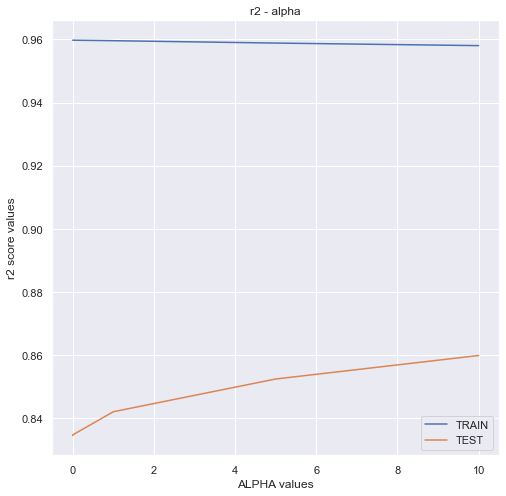

In [615]:
res['param_alpha'] = res['param_alpha'].astype('int32')

plt.figure(figsize=(8,8))
plt.plot(res['param_alpha'], res['mean_train_score'])
plt.plot(res['param_alpha'], res['mean_test_score'])
plt.xlabel('ALPHA values')
plt.ylabel('r2 score values')
plt.title("r2 - alpha")
plt.legend(['TRAIN', 'TEST'], loc='lower right')
plt.show()

In [616]:
#K-Fold with neg_mean_absolute_error
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [617]:
res2 = pd.DataFrame(model_cv.cv_results_)

In [618]:
model_cv.best_params_

{'alpha': 10.0}

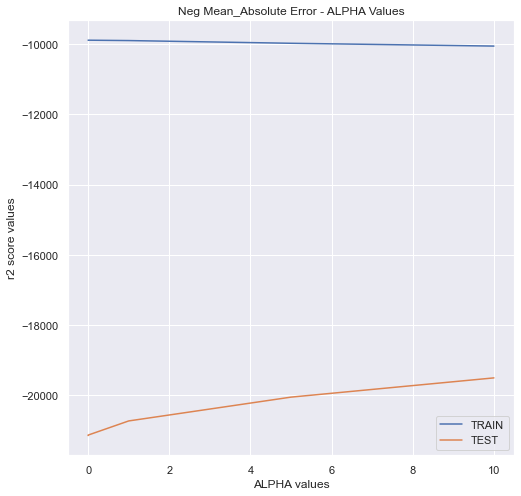

In [619]:
res2['param_alpha'] = res2['param_alpha'].astype('int32')

plt.figure(figsize=(8,8))
plt.plot(res2['param_alpha'], res2['mean_train_score'])
plt.plot(res2['param_alpha'], res2['mean_test_score'])
plt.xlabel('ALPHA values')
plt.ylabel('r2 score values')
plt.title("Neg Mean_Absolute Error - ALPHA Values")
plt.legend(['TRAIN', 'TEST'], loc='lower right')
plt.show()

In [620]:
#Taking Alpha as 10
lin_mod = Ridge(alpha=10)
lin_mod.fit(X_train, y_train)
y_train_pred = lin_mod.predict(X_train)
y_test_pred = lin_mod.predict(X_test)

In [621]:
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9530016533422974
0.90838081776989


In [622]:
# Creating dict of coefficients.
parm = list(lin_mod.coef_)
parm.insert(0, lin_mod.intercept_)
parm = [round(x, 3) for x in parm]
cols = Xval.columns
cols = cols.insert(0, "constant_val")
data_final=dict(zip(cols, parm))

In [623]:
{j: i for j, i in sorted(data_final.items(), key=lambda item: item[1])}

{'Exterior1st_Plywood': -8752.682,
 'Exterior1st_MetalSd': -8282.334,
 'Heating_GasW': -7708.653,
 'Heating_GasA': -7237.292,
 'Exterior2nd_CBlock': -4936.384,
 'MasVnrType_Stone': -4872.15,
 'Exterior2nd_CmentBd': -3561.715,
 'Condition1_PosA': -3484.311,
 'SaleCondition_Family': -3406.519,
 'PropertyAge_7': -3252.399,
 'Condition2_PosA': -3246.389,
 'LotConfig_FR2': -3108.226,
 'PropertyAge_53': -3095.052,
 'PropertyAge_65': -2966.306,
 'MasVnrType_None': -2950.103,
 'PropertyAge_41': -2903.487,
 'BldgType_TwnhsE': -2898.873,
 'PropertyAge_51': -2897.916,
 'PropertyAge_43': -2779.229,
 'Condition2_Norm': -2759.833,
 'PropertyAge_8': -2664.078,
 'PropertyAge_45': -2612.988,
 'MSSubClass_50': -2592.646,
 'PropertyAge_38': -2495.361,
 'Condition2_Feedr': -2477.201,
 'BsmtFinType2_Unf': -2464.983,
 'PropertyAge_13': -2457.36,
 'HouseStyle_1Story': -2450.77,
 'PropertyAge_59': -2427.653,
 'Exterior2nd_Other': -2420.027,
 'OverallQual_9': -2408.209,
 'PropertyAge_12': -2406.407,
 'Property

##### For Alpha : 200 ( LASSO regression)
R2 Values : (TRAIN : 0.95,TEST: 0.93) 

##### For Alpha : 10 ( RIDGE regression)
R2 Values : (TRAIN : 0.95 ,TEST:0.91) 

### The Optimum Value for ALPHA (for RIDGE) : 10 , (for LASSO) 200 
